In [25]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle
%matplotlib inline

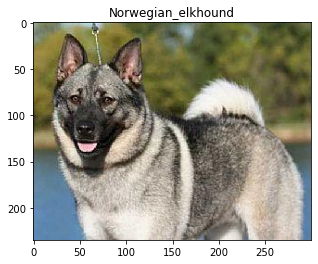

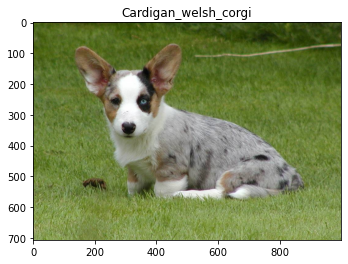

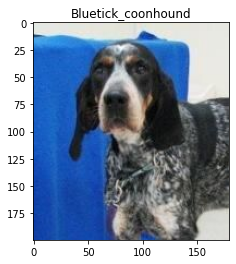

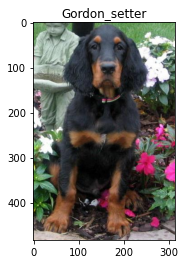

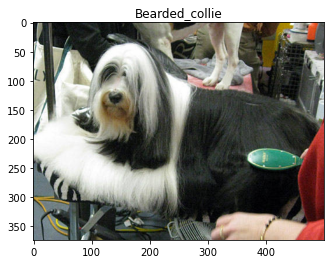

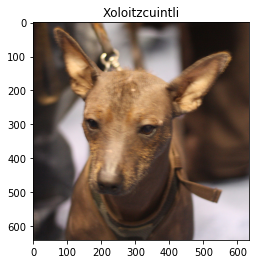

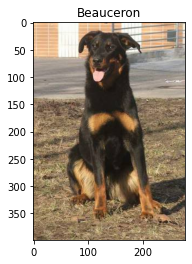

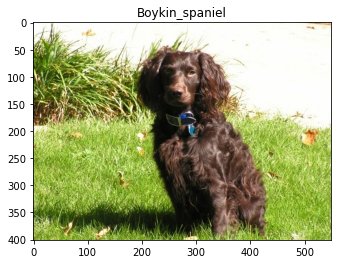

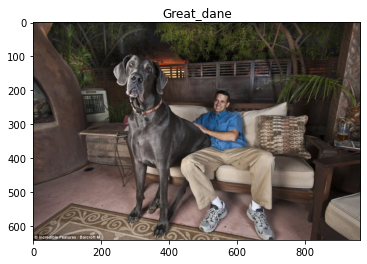

In [26]:
folder = 'dogImages/train'
sample_dogbreeds = os.listdir(folder)
shuffle(sample_dogbreeds)

for sample_dogbreed in sample_dogbreeds[0:9]:
    dogbreed = sample_dogbreed.split('.')[1]
    dogbreed_image = cv2.imread(os.path.join(folder, sample_dogbreed, os.listdir(os.path.join(folder, sample_dogbreed))[0]))
    dogbreed_image = cv2.cvtColor(dogbreed_image, cv2.COLOR_BGR2RGB)
    plt.imshow(dogbreed_image)
    plt.title(dogbreed)
    plt.show()


In [27]:
def get_width_height_aspect_ratio_list(path):
    width_list = []
    height_list = []
    aspect_ratio_list = []
    for dataset_folder in os.listdir(path):
        for class_folder in os.listdir(os.path.join(path, dataset_folder)):
            for image_file in os.listdir(os.path.join(path, dataset_folder, class_folder)):
                image = cv2.imread(os.path.join(path, dataset_folder, class_folder, image_file))
                width_list.append(image.shape[1])
                height_list.append(image.shape[0])
                aspect_ratio_list.append(image.shape[0]/image.shape[1])

    return width_list, height_list, aspect_ratio_list

In [28]:
def counts_per_class(path):
    classes = []
    counts = []
    for class_folder in os.listdir(path):
        classes.append(class_folder.split('.')[0])
        counts.append(len(os.listdir(os.path.join(path, class_folder))))

    return classes, counts

In [29]:
data_folder = 'dogImages'

width_list, height_list, aspect_ratio_list = get_width_height_aspect_ratio_list(data_folder)

average_width = sum(width_list)/len(width_list)
average_height = sum(height_list)/len(height_list)
average_aspect_ratio = sum(aspect_ratio_list)/len(aspect_ratio_list)

C:\Users\Guilherme\anaconda3\envs\dog-breed-classification\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Guilherme\anaconda3\envs\dog-breed-classification\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Guilherme\anaconda3\envs\dog-breed-classification\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

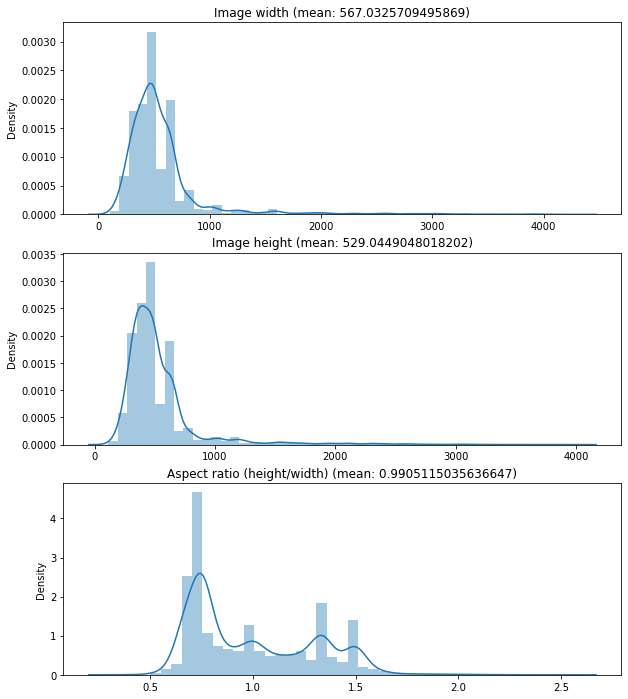

In [30]:
fig, ax = plt.subplots(3,1, figsize=(10, 12))
sns.distplot(width_list, ax=ax[0])
ax[0].set_title(f'Image width (mean: {average_width})')
sns.distplot(height_list, ax=ax[1])
ax[1].set_title(f'Image height (mean: {average_height})')
sns.distplot(aspect_ratio_list, ax=ax[2])
ax[2].set_title(f'Aspect ratio (height/width) (mean: {average_aspect_ratio})')
fig.show()

In [31]:
data_folder = 'dogImages/train'

classes, counts = counts_per_class(data_folder)

zipped_lists = zip(counts, classes)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
counts, classes = [ list(tuple) for tuple in  tuples]

counts = counts[::-1]
classes = classes[::-1]

print(min(counts))
print(max(counts))

26
77


C:\Users\Guilherme\anaconda3\envs\dog-breed-classification\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Guilherme\anaconda3\envs\dog-breed-classification\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Guilherme\AppData\Local\Temp\ipykernel_9924\3813968981.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


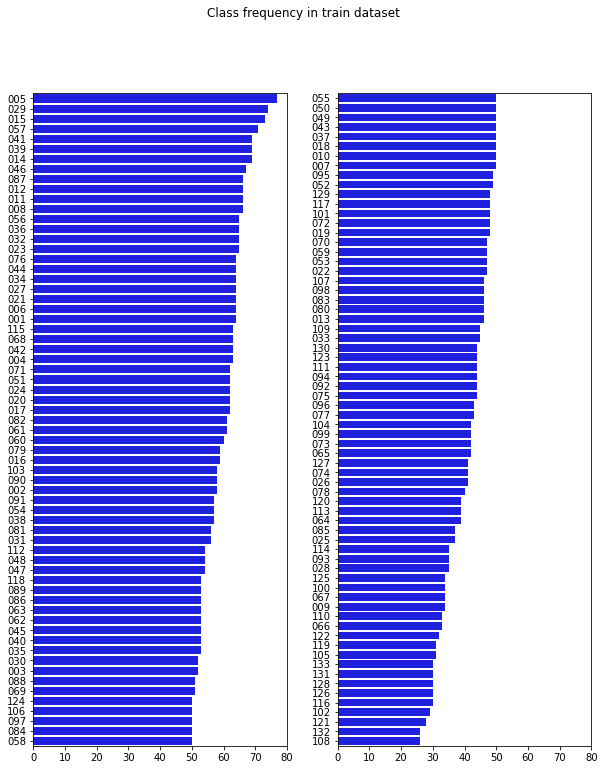

In [32]:
fig, ax = plt.subplots(1,2, figsize=(10, 12))
sns.barplot(counts[0:65], classes[0:65], ax=ax[0], color='blue')
sns.barplot(counts[65:], classes[65:], ax=ax[1], color='blue')

fig.suptitle(f'Class frequency in train dataset')

ax[0].set_xlim(0,80)
ax[1].set_xlim(0,80)

fig.show()